# **CORRECCIÓN**
Valenzuela Santos Damarys 744494

# **EXAMEN TEÓRICO**

1.        ¿Qué es un pipeline?
Es un diagrama que sigue una secuencia ordenada de pasos. En este caso, lo utilizábamos en clase para organizar los procesos necesarios para construir nuestro modelo, como la limpieza y transformación de datos, la estandarización, el entrenamiento y la evaluación del modelo.


2.        ¿Cuál es el propósito de realizar regresiones? Explica las ventajas y desventajas de los dos planteamientos vistos en clase.

El propósito principal de la regresión es interpolar, cuando predecimos dentro del rango de datos que tuvimos para construir nuestro modelo, o extrapolar, cuando los valores de la predicción están fuera del rango de los datos originales. Todo esto se hace para predecir una variable de salida a partir de una o varias variables de entrada.

Existen dos enfoques principales:

Estadística inferencial: busca entender la relación entre los factores y la salida. En este enfoque se interpretan los coeficientes, se prueban hipótesis y se analiza la significancia de cada variable. Su desventaja es que se centra en la explicación del modelo, pero no necesariamente en lograr la mejor predicción.

Machine Learning: se enfoca en obtener la mejor predicción posible, sin importar tanto la interpretación de los coeficientes. Su ventaja es la alta precisión y la flexibilidad para modelar patrones complejos. Su desventaja es que se sacrifica la interpretabilidad para conseguir un buen desempeño predictivo.


3.        ¿En qué consiste el proceso de escalamiento de factores?

El escalamiento de factores consiste en transformar las variables para que estén en una misma escala numérica. Esto es para evitar que variables con valores muy grandes dominen sobre otras más pequeñas y así asegurar que todos los factores tengan la misma importancia relativa en el modelo.


4.        Explica el propósito de penalizar factores en una regresión.

El propósito de penalizar factores es evitar el sobreajuste y mejorar la capacidad de generalización del modelo. En Ridge los coeficientes se reducen pero no llegan a cero, en Lasso algunos se vuelven cero eliminando variables irrelevantes, y Elastic Net combina ambas ventajas. Así se simplifica el modelo y mejora su capacidad de predicción.


5.        ¿Cuál es la relación entre escalamiento y penalización?

La relación entre escalamiento y penalización es que el escalamiento resulta esencial para la penalización, ya que la penalización actúa sobre la magnitud de los coeficientes. Si las variables no están en la misma escala, aquellas con valores grandes parecerán menos penalizadas, mientras que las de valores pequeños recibirán un castigo mayor, lo que genera resultados inconsistentes. Al estandarizar las variables, todas adquieren la misma importancia inicial y la penalización se aplica de manera justa.


6.        Explica el concepto de una prueba de hipótesis.

Una prueba de hipótesis es una herramienta estadística que permite tomar decisiones o sacar conclusiones sobre una población a partir de una muestra, con un cierto nivel de confianza. El proceso esta en plantear dos hipótesis: la hipótesis nula (H₀), que representa la situación inicial o de no efecto, y la hipótesis alternativa (H₁), que es la afirmación que queremos probar. Se evalua, y si esta evidencia es lo suficientemente fuerte, se rechaza la hipótesis nula.En clase, este método se ha aplicado para analizar si una variable tiene un impacto significativo en la predicción de otra.


7.        Explica la interpretación de un p-value de una prueba de hipótesis que compara contra una media µ.

El p-value indica la probabilidad de obtener los resultados observados si la media poblacional realmente fuera igual a µ. Si el p-value es pequeño, significa que esa diferencia es muy poco probable por azar, por lo que rechazamos la hipótesis nula y concluimos que la media poblacional probablemente no es igual a µ.


8.        Describe el propósito de realizar cross-validation.

El propósito de cross-validation es evaluar de manera más confiable el desempeño de un modelo al probarlo en diferentes subconjuntos de datos. Se entrena con una parte y se valida con la restante. Esto permite estimar cómo se comportará el modelo con datos nuevos, ayuda a detectar y reducir el overfitting, y en general asegura que el modelo pueda generalizar mejor a situaciones no vistas.



9.        Describe los pasos que seguirías al hacer un análisis exploratorio de datos. Justifica cada paso.

Un análisis exploratorio de datos (EDA) comienza con una inspección inicial para conocer las variables, seguido de una limpieza que corrige valores faltantes, duplicados o errores. Después se puede calcular estadísticas descriptivas para identificar distribuciones, outliers y relaciones entre variables. Finalmente, se extraen conclusiones que permiten entender mejor los datos y orientar el modelado posterior.


10.        ¿Qué es el teorema del límite central?

El Teorema nos dice que si aumentamos el tamaño de la muestra la distribución se hara una distribución normal.


#**EXAMEN PRÁCTICO**

# 1. NO CAMBIE NADA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/tmp/ipython-input-2807491299.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


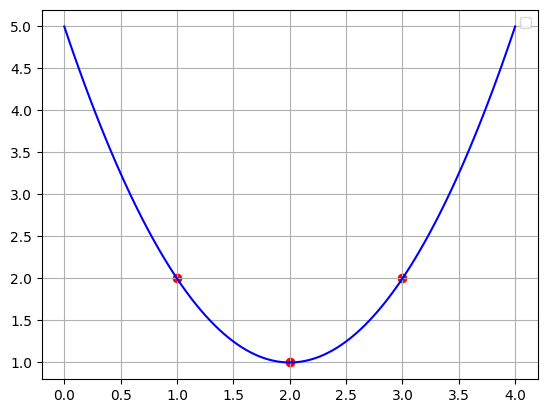

In [2]:
X = np.array([[1], [2], [3]])
y = np.array([2, 1, 2])
X_quad = np.column_stack((X, X**2))
modelo = LinearRegression()
modelo.fit(X_quad, y)

x_range = np.linspace(0, 4, 100).reshape(-1, 1)
x_range_quad = np.column_stack((x_range, x_range**2))
y_pred = modelo.predict(x_range_quad)

plt.scatter(X, y, color="red")
plt.plot(x_range, y_pred, color="blue")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
print(modelo.coef_)
print(modelo.intercept_)

[-4.  1.]
4.9999999999999964


# 2. No cambie nada

Primero esta tomando un dataset de la libreria de sklearn.datasets, luego esta poniendo en X las columnas de las caracteristicas y en Y esta poniendo el objetivo. Luego esta escalando las caracteristicas que hay en X .  Crea un modelo de regresión lineal dentro de un pipeline. Luego aplica validación cruzada de 10 folds para evaluar el modelo con MSE, como scikit lo devuelve negativo cambiamos el signo y se calcula el promedio y la desviacion estandar de los errores. Y sacamos RSE con la raiz cuadrada de ese promedio y podemos tener el error en las mismas unidades que la variable objetivo.

# 3.

¿Cuál fue el error?
El error fue manipular los datos sin analizarlos previamente. Eliminé varias columnas que me parecía irrelevante, sin verificar qué representaba realmente. Además, al generar variables dummies, estas aparecieron como valores booleanos (True/False) en lugar de numéricos (0/1), ya que no especifiqué el parámetro dtype=int.

¿Cuál es la corrección?
La corrección es revisar y entender el dataset antes de modificarlo. Esto significa comprobar qué aporta cada columna antes de eliminarla y asegurarse de que las transformaciones, como las dummies, se realicen correctamente usando dtype=int para obtener valores 0 y 1.

¿Por qué se cometió el error?
El error se cometió por la presión del tiempo y las prisas durante la limpieza de datos. Vi la columna Unnamed: 0 como irrelevante y la borré sin revisarla, además de pasar por alto un detalle técnico en la creación de las dummies, lo que me hizo perder tiempo corrigiéndolo después.

¿Cómo se puede evitar este error en el futuro?
Se puede evitar aplicando un análisis exploratorio básico al inicio, usando funciones como df.info(), df.head() y df.describe() para entender mejor los datos. También ayuda mantener el código organizado en pasos claros (limpieza, transformación, modelado) y documentar con comentarios las decisiones.

In [109]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv("imdb_top1000_lae.csv")

# Limpiar y acomodar

In [110]:
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False).astype(float)

df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')

df.head()


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,Gross,Drama,...,Fantasy,Family,Thriller,Romance,Sci-Fi,War,Music,Musical,Sport,History
0,0,The Shawshank Redemption,1994.0000,A,142.0000,9.3000,80.0000,Frank Darabont,28341469.0000,1,...,0,0,0,0,0,0,0,0,0,0
1,1,The Godfather,1972.0000,A,175.0000,9.2000,100.0000,Francis Ford Coppola,134966411.0000,1,...,0,0,0,0,0,0,0,0,0,0
2,2,The Dark Knight,2008.0000,UA,152.0000,9.0000,84.0000,Christopher Nolan,534858444.0000,1,...,0,0,0,0,0,0,0,0,0,0
3,3,The Godfather: Part II,1974.0000,A,202.0000,9.0000,90.0000,Francis Ford Coppola,57300000.0000,1,...,0,0,0,0,0,0,0,0,0,0
4,4,12 Angry Men,1957.0000,U,96.0000,9.0000,96.0000,Sidney Lumet,4360000.0000,1,...,0,0,0,0,0,0,0,0,0,0


# Dummies

In [111]:
df = pd.get_dummies(df, columns=['Certificate'], drop_first=True , dtype=int)

In [112]:
from sklearn.model_selection import train_test_split

X = df.drop(["IMDB_Rating", "Series_Title", "Director"], axis=1)
y = df["IMDB_Rating"]

#No dropear nans sino poner la media
imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

lir = LinearRegression()
lir.fit(X_train, y_train)

y_pred = lir.predict(X_test)

print("R² train:", lir.score(X_train, y_train))
print("R² test :", lir.score(X_test, y_test))

R² train: 0.8979738068597078
R² test : 0.9327573044810972


In [113]:
from scipy import stats

X_design = np.column_stack([np.ones(X_train.shape[0]), X_train])

y_hat = lir.predict(X_train)

rss = np.sum((y_train - y_hat) ** 2)
n, k = X_train.shape
rse = np.sqrt(rss / (n - k - 1))

var_beta = np.linalg.inv(X_design.T @ X_design) * rse**2
std_beta = np.sqrt(np.diag(var_beta))

coefs = np.insert(lir.coef_, 0, lir.intercept_)

t_stats = coefs / std_beta
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - k - 1)) for t in t_stats]


results = pd.DataFrame({
    "Variable": ["Intercepto"] + list(X.columns),
    "Coef": coefs,
    "Std_Error": std_beta,
    "t_value": t_stats,
    "p_value": p_values
})

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
print("\nResultados completos (todas las variables):")
display(results)


Resultados completos (todas las variables):


,Variable,Coef,Std_Error,t_value,p_value
0,Intercepto,7.9504,37967.2193,0.0002,0.9998
1,Unnamed: 0,-0.2567,0.0036,-72.0738,0.0000
2,Released_Year,-0.0346,0.0047,-7.4108,0.0000
3,Runtime,0.0058,0.0040,1.4690,0.1423
4,Meta_score,0.0027,0.0036,0.7475,0.4550
5,Gross,0.0185,0.0041,4.4777,0.0000
6,Drama,0.0037,0.0048,0.7580,0.4487
7,Crime,0.0045,0.0038,1.1630,0.2452
8,Action,-0.0018,0.0041,-0.4311,0.6665
9,Biography,-0.0033,0.0038,-0.8623,0.3888


# Nuevo modelo

In [114]:
df_model = df.dropna(subset=['IMDB_Rating'])
X = df_model[['Unnamed: 0', 'Released_Year', 'Gross', 'Certificate_A']]
y = df_model['IMDB_Rating']

#imputar mediana
imputer = SimpleImputer(strategy='median')
X_imp = imputer.fit_transform(X)

In [115]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [117]:
lir = LinearRegression()
lir.fit(X_train, y_train)

y_pred = lir.predict(X_test)

print("R² train:", lir.score(X_train, y_train))
print("R² test :", lir.score(X_test, y_test))

R² train: 0.8935325320602442
R² test : 0.9333565435413878


In [118]:
X_design = np.column_stack([np.ones(X_train.shape[0]), X_train])

y_hat = lir.predict(X_train)

rss = np.sum((y_train - y_hat) ** 2)
n, k = X_train.shape
rse = np.sqrt(rss / (n - k - 1))

var_beta = np.linalg.inv(X_design.T @ X_design) * rse**2
std_beta = np.sqrt(np.diag(var_beta))

coefs = np.insert(lir.coef_, 0, lir.intercept_)

t_stats = coefs / std_beta
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - k - 1)) for t in t_stats]

results = pd.DataFrame({
    "Variable": ["Intercepto"] + list(X.columns),
    "Coef": coefs,
    "Std_Error": std_beta,
    "t_value": t_stats,
    "p_value": p_values
})

pd.set_option("display.float_format", lambda x: f"{x:.4f}")
print("\nResultados OLS (todas las variables):")
print(results)


Resultados OLS (todas las variables):
        Variable    Coef  Std_Error   t_value  p_value
0     Intercepto  7.9509     0.0032 2449.0283   0.0000
1     Unnamed: 0 -0.2590     0.0033  -79.5157   0.0000
2  Released_Year -0.0285     0.0033   -8.5283   0.0000
3          Gross  0.0151     0.0035    4.3512   0.0000
4  Certificate_A  0.0173     0.0033    5.3177   0.0000


Al comienzo del análisis revisé qué variables podrían ser más útiles para predecir el IMDB Rating. Consideré que el nombre de la película no aportaba valor y probé con los directores más repetidos, pero no mejoraron el ajuste, por lo que decidí descartarlos. En cambio, las variables relacionadas con el año de estreno, los ingresos (Gross) y la clasificación por certificado parecían más relevantes, por lo que creé dummies para esta última. Además, opté por imputar los valores faltantes con la media en lugar de eliminarlos, para no perder observaciones.

Tras calcular los p-values observé que muchas variables no eran significativas y solo cuatro tenían valores inferiores a 0.05: Unnamed: 0, Released_Year, Gross y Certificate_A. Con estas construí el modelo definitivo de regresión lineal, aplicando escalado y separando los datos en train/test (80/20). El modelo alcanzó un R² de 0.89 en train y 0.93 en test, mostrando un buen poder predictivo y confirmando que esas variables son las más relevantes para explicar la variación en el IMDB Rating.